## «Анализ данных об оптовых продажах аудиотехники»

Проведем анализ данных компании «Карпов Саунд», которая занимается оптовой продажей аудиотехники и предлагает широкий ассортимент товаров от ведущих мировых брендов, включающий профессиональные аудиосистемы, домашние кинотеатры, портативные аудиоустройства и прочие аксессуары.

Данные собраны в формате резервной выгрузке (разрозненные папки с данными). Выполним :  
- сборка датасета, 
- анализ динамики заказов, 
- подсчет revenue, AOV, 
- top brands, top managers

In [1]:
import pandas as pd
import os

In [2]:
orders = 'data/orders/'
for path, dirs, files in os.walk(orders):
    print(path, dirs, files)

data/orders/ ['2024-03-01', '2024-03-02', '2024-03-03', '2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07', '2024-03-08', '2024-03-09', '2024-03-10', '2024-03-11', '2024-03-12', '2024-03-13', '2024-03-14', '2024-03-15', '2024-03-16', '2024-03-17', '2024-03-18', '2024-03-19', '2024-03-20', '2024-03-21', '2024-03-22', '2024-03-23', '2024-03-24', '2024-03-25', '2024-03-26', '2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30', '2024-03-31'] []
data/orders/2024-03-01 ['Алексей Саксофонов', 'Аркадий Октавин', 'Виктор Тромбонов', 'Владимир Ударников', 'Екатерина Тарелкина', 'Ксения Балалайкина', 'Максим Барабанов', 'Маргарита Камертонова', 'Надежда Гармошкина', 'Сергей Контрабасов'] []
data/orders/2024-03-01/Алексей Саксофонов [] ['orders.csv', 'order_status.csv']
data/orders/2024-03-01/Аркадий Октавин [] ['orders.csv', 'order_status.csv']
data/orders/2024-03-01/Виктор Тромбонов [] ['orders.csv', 'order_status.csv']
data/orders/2024-03-01/Владимир Ударников [] ['orders.csv', 'order_sta

In [3]:
file_paths_orders = []
# Запускаем цикл for cовместно с методом os.walk() по папке data
# В переменной path находится текущий путь (папка data), dirs — список подпапок в текущей папке, files — список файлов в них
for path, dirs, files in os.walk(orders):
    # Вложенный цикл для перебора файлов в текущей папке
    for file in files:
        # Проверка формата файла — файл должен заканчиваться на '.csv'
        if file.endswith('orders.csv'):
            # Построение полного пути к файлу с помощью os.path.join(), объединяя текущий путь path и имя файла file
            file_path = os.path.join(path, file)
            # Добавляем получившийся путь в список
            file_paths_orders.append(file_path)

In [4]:
file_paths_orders

['data/orders/2024-03-01/Алексей Саксофонов/orders.csv',
 'data/orders/2024-03-01/Аркадий Октавин/orders.csv',
 'data/orders/2024-03-01/Виктор Тромбонов/orders.csv',
 'data/orders/2024-03-01/Владимир Ударников/orders.csv',
 'data/orders/2024-03-01/Екатерина Тарелкина/orders.csv',
 'data/orders/2024-03-01/Ксения Балалайкина/orders.csv',
 'data/orders/2024-03-01/Максим Барабанов/orders.csv',
 'data/orders/2024-03-01/Маргарита Камертонова/orders.csv',
 'data/orders/2024-03-01/Надежда Гармошкина/orders.csv',
 'data/orders/2024-03-01/Сергей Контрабасов/orders.csv',
 'data/orders/2024-03-02/Виктор Тромбонов/orders.csv',
 'data/orders/2024-03-02/Владимир Ударников/orders.csv',
 'data/orders/2024-03-03/Маргарита Камертонова/orders.csv',
 'data/orders/2024-03-04/Анастасия Дудкина/orders.csv',
 'data/orders/2024-03-04/Виктор Тромбонов/orders.csv',
 'data/orders/2024-03-04/Владимир Ударников/orders.csv',
 'data/orders/2024-03-04/Екатерина Тарелкина/orders.csv',
 'data/orders/2024-03-04/Ксения Бал

In [5]:
df_orders = pd.DataFrame()

for file_path in file_paths_orders:
    data = pd.read_csv(file_path)
    name = file_path.split('/')[-2]
        # Извлекаем дату
    # Разделяем путь по символу '/' и берем третий элемент с конца
    date = file_path.split('/')[-3]
        
        # Добавляем новые столбцы
    data['manager'] = name
    data['date'] = date
    df_orders = pd.concat([df_orders, data], ignore_index=True)

In [6]:
df_orders

,order_id,product_id,quantity,manager,date
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01
3,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01
4,DUEU-27693834,1413,6,Алексей Саксофонов,2024-03-01
...,...,...,...,...,...
4598,OYBY-86181208,1575,3,Анастасия Дудкина,2024-03-31
4599,OYBY-86181208,941,11,Анастасия Дудкина,2024-03-31
4600,OYBY-86181208,1335,22,Анастасия Дудкина,2024-03-31
4601,OYBY-86181208,296,22,Анастасия Дудкина,2024-03-31


In [7]:
file_paths_orders_status = []
# Запускаем цикл for cовместно с методом os.walk() по папке data
# В переменной path находится текущий путь (папка data), dirs — список подпапок в текущей папке, files — список файлов в них
for path, dirs, files in os.walk(orders):
    # Вложенный цикл для перебора файлов в текущей папке
    for file in files:
        # Проверка формата файла — файл должен заканчиваться на '.csv'
        if file.endswith('status.csv'):
            # Построение полного пути к файлу с помощью os.path.join(), объединяя текущий путь path и имя файла file
            file_path = os.path.join(path, file)
            # Добавляем получившийся путь в список
            file_paths_orders_status.append(file_path)

In [8]:
file_paths_orders_status

['data/orders/2024-03-01/Алексей Саксофонов/order_status.csv',
 'data/orders/2024-03-01/Аркадий Октавин/order_status.csv',
 'data/orders/2024-03-01/Виктор Тромбонов/order_status.csv',
 'data/orders/2024-03-01/Владимир Ударников/order_status.csv',
 'data/orders/2024-03-01/Екатерина Тарелкина/order_status.csv',
 'data/orders/2024-03-01/Ксения Балалайкина/order_status.csv',
 'data/orders/2024-03-01/Максим Барабанов/order_status.csv',
 'data/orders/2024-03-01/Маргарита Камертонова/order_status.csv',
 'data/orders/2024-03-01/Надежда Гармошкина/order_status.csv',
 'data/orders/2024-03-01/Сергей Контрабасов/order_status.csv',
 'data/orders/2024-03-02/Виктор Тромбонов/order_status.csv',
 'data/orders/2024-03-02/Владимир Ударников/order_status.csv',
 'data/orders/2024-03-03/Маргарита Камертонова/order_status.csv',
 'data/orders/2024-03-04/Анастасия Дудкина/order_status.csv',
 'data/orders/2024-03-04/Виктор Тромбонов/order_status.csv',
 'data/orders/2024-03-04/Владимир Ударников/order_status.csv

In [9]:
df_order_status = pd.DataFrame()

for file_path in file_paths_orders_status:
        data = pd.read_csv(file_path)
        df_order_status = pd.concat([df_order_status, data], ignore_index=True)

In [10]:
df_order_status

,order_id,client_id,status
0,DUEU-27693834,14,confirmed
1,VHJV-14331014,43,confirmed
2,MSXQ-45152143,61,confirmed
3,LOSS-76956574,94,confirmed
4,OPAU-19106120,33,confirmed
...,...,...,...
341,UBQN-94821029,35,confirmed
342,JHUM-48790671,70,confirmed
343,XRPC-48091227,52,confirmed
344,RJPI-21712323,22,confirmed


In [11]:
products = 'data/products/'
for path, dirs, files in os.walk(products):
    print(path, dirs, files)

data/products/ ['AV-процессор', 'AV-ресивер', 'Активные колонки', 'Беспроводная акустика', 'Беспроводные наушники', 'Виниловый проигрыватель', 'Динамический микрофон', 'Домашний кинотеатр', 'Интегральный усилитель', 'Комплекты акустики', 'Конденсаторный микрофон', 'Ламповый усилитель', 'Музыкальный центр', 'Напольная акустика', 'Настенная акустика', 'Наушники с микрофоном', 'Полочная акустика', 'Портативная акустика', 'Предусилитель', 'Проводные наушники', 'Сабвуфер', 'Саундбар', 'Система караоке', 'Умная колонка', 'Усилитель мощности', 'Центральный канал'] []
data/products/AV-процессор [] ['products.csv']
data/products/AV-ресивер [] ['products.csv']
data/products/Активные колонки [] ['products.csv']
data/products/Беспроводная акустика [] ['products.csv']
data/products/Беспроводные наушники [] ['products.csv']
data/products/Виниловый проигрыватель [] ['products.csv']
data/products/Динамический микрофон [] ['products.csv']
data/products/Домашний кинотеатр [] ['products.csv']
data/produc

In [12]:
file_paths_products = []
# Запускаем цикл for cовместно с методом os.walk() по папке data
# В переменной path находится текущий путь (папка data), dirs — список подпапок в текущей папке, files — список файлов в них
for path, dirs, files in os.walk(products):
    # Вложенный цикл для перебора файлов в текущей папке
    for file in files:
        # Проверка формата файла — файл должен заканчиваться на '.csv'
        if file.endswith('products.csv'):
            # Построение полного пути к файлу с помощью os.path.join(), объединяя текущий путь path и имя файла file
            file_path = os.path.join(path, file)
            # Добавляем получившийся путь в список
            file_paths_products.append(file_path)
            
df_products = pd.DataFrame()

for file_path in file_paths_products:
    data = pd.read_csv(file_path)
    name = file_path.split('/')[-2]
        # Извлекаем дату
    # Разделяем путь по символу '/' и берем третий элемент с конца        
        # Добавляем новые столбцы
    data['category'] = name
    df_products = pd.concat([df_products, data], ignore_index=True)

In [13]:
df_products

,id,name,price,category
0,36,"Anthem, AVM 70",2580.03,AV-процессор
1,40,"Arcam, AV860",3400.64,AV-процессор
2,41,"Arcam, AVR30",3600.85,AV-процессор
3,205,"Denon, AVC-X8500H",3600.95,AV-процессор
4,206,"Denon, AVC-X6700H",2225.50,AV-процессор
...,...,...,...,...
1672,1565,"Wharfedale, Diamond 220C",324.24,Центральный канал
1673,1673,"Yamaha, NS-C210",86.80,Центральный канал
1674,1674,"Yamaha, NS-C210BL",75.98,Центральный канал
1675,1675,"Yamaha, NS-C444",165.50,Центральный канал


In [14]:
df_orders.to_csv('df_orders.csv', index=False)
df_order_status.to_csv('df_order_status.csv', index=False)
df_products.to_csv('df_products.csv', index=False)

In [15]:
a = pd.read_csv('df_orders.csv')

In [16]:
df_orders

,order_id,product_id,quantity,manager,date
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01
3,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01
4,DUEU-27693834,1413,6,Алексей Саксофонов,2024-03-01
...,...,...,...,...,...
4598,OYBY-86181208,1575,3,Анастасия Дудкина,2024-03-31
4599,OYBY-86181208,941,11,Анастасия Дудкина,2024-03-31
4600,OYBY-86181208,1335,22,Анастасия Дудкина,2024-03-31
4601,OYBY-86181208,296,22,Анастасия Дудкина,2024-03-31


In [17]:
df_orders['date'] = pd.to_datetime(df_orders['date'], format='%Y-%m-%d')

In [18]:
max_sales = df_orders.groupby('date', as_index = False).order_id.nunique().rename(columns = {'order_id':'orders'}).sort_values('orders', ascending = False)

In [19]:
max_sales

,date,orders
13,2024-03-14,34
12,2024-03-13,24
0,2024-03-01,22
28,2024-03-29,19
4,2024-03-05,18
26,2024-03-27,18
14,2024-03-15,17
25,2024-03-26,17
21,2024-03-22,16
11,2024-03-12,15


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# max_sales['day_of_week'] = df['date'].dt.day_name()  # Получаем название дня недели
max_sales['day_of_week_num'] = max_sales['date'].dt.dayofweek  # Получаем номер дня недели (0 - понедельник, 6 - воскресенье)

In [22]:
max_sales_day = max_sales.groupby('day_of_week_num', as_index = False).agg({'orders':'sum'}).sort_values('day_of_week_num')

In [23]:
max_sales_day

,day_of_week_num,orders
0,0,43
1,1,65
2,2,70
3,3,73
4,4,75
5,5,10
6,6,10


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7')])

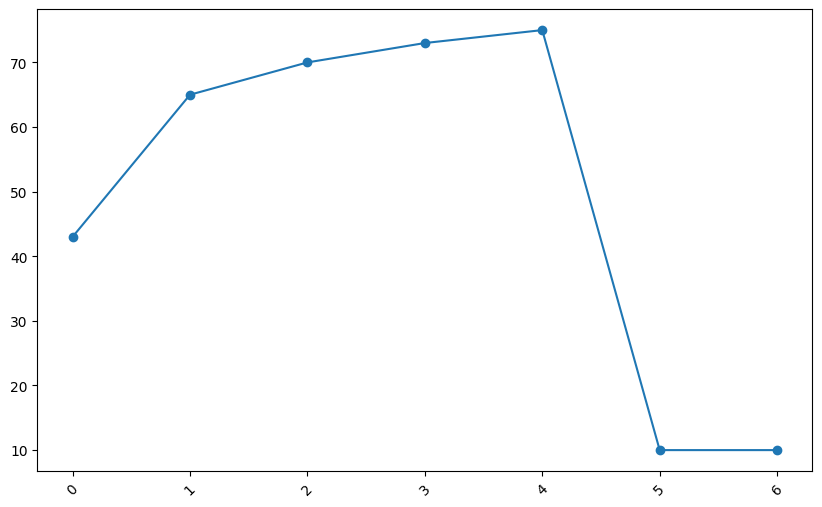

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(max_sales_day['day_of_week_num'], max_sales_day['orders'], marker='o')
plt.xticks(rotation=45)

In [25]:
import numpy as np

# Определяем, является ли день выходным
max_sales['is_weekend'] = max_sales['date'].dt.dayofweek >= 5  # 5 и 6 - это суббота и воскресенье

# Определяем, является ли день рабочим
# max_sales['is_weekday'] = ~max_sales['is_weekend']  # Будний день - это не выходной
# Список праздничных дней
holidays = pd.to_datetime(['2024-03-08'])  # Пример праздников

# Определяем, является ли день праздничным
max_sales['is_holiday'] = max_sales['date'].isin(holidays)

In [26]:
max_sales

,date,orders,day_of_week_num,is_weekend,is_holiday
13,2024-03-14,34,3,False,False
12,2024-03-13,24,2,False,False
0,2024-03-01,22,4,False,False
28,2024-03-29,19,4,False,False
4,2024-03-05,18,1,False,False
26,2024-03-27,18,2,False,False
14,2024-03-15,17,4,False,False
25,2024-03-26,17,1,False,False
21,2024-03-22,16,4,False,False
11,2024-03-12,15,1,False,False


In [27]:
Sunday = max_sales.loc[max_sales.day_of_week_num == 6]
Sunday

,date,orders,day_of_week_num,is_weekend,is_holiday
9,2024-03-10,3,6,True,False
16,2024-03-17,3,6,True,False
23,2024-03-24,2,6,True,False
2,2024-03-03,1,6,True,False
30,2024-03-31,1,6,True,False


In [28]:
Monday = max_sales.loc[max_sales.day_of_week_num == 0]
Monday

,date,orders,day_of_week_num,is_weekend,is_holiday
17,2024-03-18,12,0,False,False
10,2024-03-11,12,0,False,False
3,2024-03-04,10,0,False,False
24,2024-03-25,9,0,False,False


In [29]:
Friday = max_sales.loc[max_sales.day_of_week_num == 4]
Friday

,date,orders,day_of_week_num,is_weekend,is_holiday
0,2024-03-01,22,4,False,False
28,2024-03-29,19,4,False,False
14,2024-03-15,17,4,False,False
21,2024-03-22,16,4,False,False
7,2024-03-08,1,4,False,True


In [30]:
df_orders

,order_id,product_id,quantity,manager,date
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01
3,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01
4,DUEU-27693834,1413,6,Алексей Саксофонов,2024-03-01
...,...,...,...,...,...
4598,OYBY-86181208,1575,3,Анастасия Дудкина,2024-03-31
4599,OYBY-86181208,941,11,Анастасия Дудкина,2024-03-31
4600,OYBY-86181208,1335,22,Анастасия Дудкина,2024-03-31
4601,OYBY-86181208,296,22,Анастасия Дудкина,2024-03-31


In [31]:
orders_order_id_unique = df_orders.order_id.nunique()
orders_order_id_unique

346

In [32]:
orders_status = df_orders.merge(df_order_status, on=['order_id'])
orders_status.product_id = orders_status.product_id.astype('int64')

In [33]:
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,14,confirmed
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,14,confirmed
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01,14,confirmed
3,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01,14,confirmed
4,DUEU-27693834,1413,6,Алексей Саксофонов,2024-03-01,14,confirmed
...,...,...,...,...,...,...,...
4598,OYBY-86181208,1575,3,Анастасия Дудкина,2024-03-31,11,confirmed
4599,OYBY-86181208,941,11,Анастасия Дудкина,2024-03-31,11,confirmed
4600,OYBY-86181208,1335,22,Анастасия Дудкина,2024-03-31,11,confirmed
4601,OYBY-86181208,296,22,Анастасия Дудкина,2024-03-31,11,confirmed


In [34]:
orders_status.to_csv('orders_status.csv', index=False)

In [35]:
orders_status_confirmed = orders_status.loc[orders_status.status =='confirmed']

In [36]:
orders_status_confirmed = orders_status_confirmed.drop_duplicates(subset = 'order_id')

In [37]:
orders_status_confirmed

,order_id,product_id,quantity,manager,date,client_id,status
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,14,confirmed
17,VHJV-14331014,1550,15,Аркадий Октавин,2024-03-01,43,confirmed
36,MSXQ-45152143,420,7,Виктор Тромбонов,2024-03-01,61,confirmed
45,LOSS-76956574,280,34,Виктор Тромбонов,2024-03-01,94,confirmed
65,OPAU-19106120,1238,15,Виктор Тромбонов,2024-03-01,33,confirmed
...,...,...,...,...,...,...,...
4541,UBQN-94821029,600,21,Маргарита Камертонова,2024-03-29,35,confirmed
4561,JHUM-48790671,854,4,Маргарита Камертонова,2024-03-29,70,confirmed
4573,XRPC-48091227,495,12,Виктор Тромбонов,2024-03-30,52,confirmed
4580,RJPI-21712323,473,5,Екатерина Тарелкина,2024-03-30,22,confirmed


In [38]:
orders_status_canceled = orders_status.loc[orders_status.status =='canceled']
orders_status_canceled = orders_status_canceled.drop_duplicates(subset = 'order_id')
orders_status_canceled

,order_id,product_id,quantity,manager,date,client_id,status
107,BZHU-92977894,630,14,Владимир Ударников,2024-03-01,29,canceled
142,CGLU-02678560,1191,10,Владимир Ударников,2024-03-01,95,canceled
862,LOIF-61240616,559,26,Максим Барабанов,2024-03-06,60,canceled
966,VKCL-49718185,1644,2,Екатерина Тарелкина,2024-03-07,27,canceled
1132,BKWO-98301947,1286,8,Надежда Гармошкина,2024-03-09,63,canceled
1158,MAQJ-95867467,317,16,Екатерина Тарелкина,2024-03-10,84,canceled
1245,TMDN-03262100,215,18,Владимир Ударников,2024-03-11,23,canceled
1481,UHJG-73205112,283,44,Владимир Ударников,2024-03-12,77,canceled
1547,CXES-07518609,1637,22,Маргарита Камертонова,2024-03-12,49,canceled
1573,AFIH-00611801,511,13,Алексей Саксофонов,2024-03-13,43,canceled


In [39]:
orders_status_canceled.order_id.count()

37

In [40]:
orders_status_confirmed.order_id.count()

309

In [41]:
rate_canceled = (orders_status_canceled.order_id.count()/(orders_status_canceled.order_id.count()+orders_status_confirmed.order_id.count())).round(2)

In [42]:
rate_canceled

0.11

In [43]:
orders_status_gr =  orders_status.drop_duplicates(subset = 'order_id')
orders_status_gr = orders_status.groupby(['date','status'], as_index = False).agg({'order_id':'count'}).rename(columns = {'order_id':'orders'})

In [44]:
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,14,confirmed
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,14,confirmed
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01,14,confirmed
3,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01,14,confirmed
4,DUEU-27693834,1413,6,Алексей Саксофонов,2024-03-01,14,confirmed
...,...,...,...,...,...,...,...
4598,OYBY-86181208,1575,3,Анастасия Дудкина,2024-03-31,11,confirmed
4599,OYBY-86181208,941,11,Анастасия Дудкина,2024-03-31,11,confirmed
4600,OYBY-86181208,1335,22,Анастасия Дудкина,2024-03-31,11,confirmed
4601,OYBY-86181208,296,22,Анастасия Дудкина,2024-03-31,11,confirmed


In [45]:
orders_status_gr

,date,status,orders
0,2024-03-01,canceled,29
1,2024-03-01,confirmed,273
2,2024-03-02,confirmed,30
3,2024-03-03,confirmed,8
4,2024-03-04,confirmed,143
5,2024-03-05,confirmed,222
6,2024-03-06,canceled,12
7,2024-03-06,confirmed,209
8,2024-03-07,canceled,5
9,2024-03-07,confirmed,196


In [46]:
orders_status_pivot = orders_status_gr.pivot_table(index='date', columns='status', values='orders', aggfunc='sum', fill_value=0)

In [47]:
orders_status_pivot.loc[orders_status_pivot.confirmed ==0]


status,canceled,confirmed
date,,
2024-03-09,18,0


In [48]:
orders_status_pivot.sort_values('confirmed', ascending = False)

status,canceled,confirmed
date,,
2024-03-14,0,437
2024-03-01,29,273
2024-03-29,0,241
2024-03-05,0,222
2024-03-26,14,217
2024-03-15,16,209
2024-03-06,12,209
2024-03-27,0,203
2024-03-07,5,196


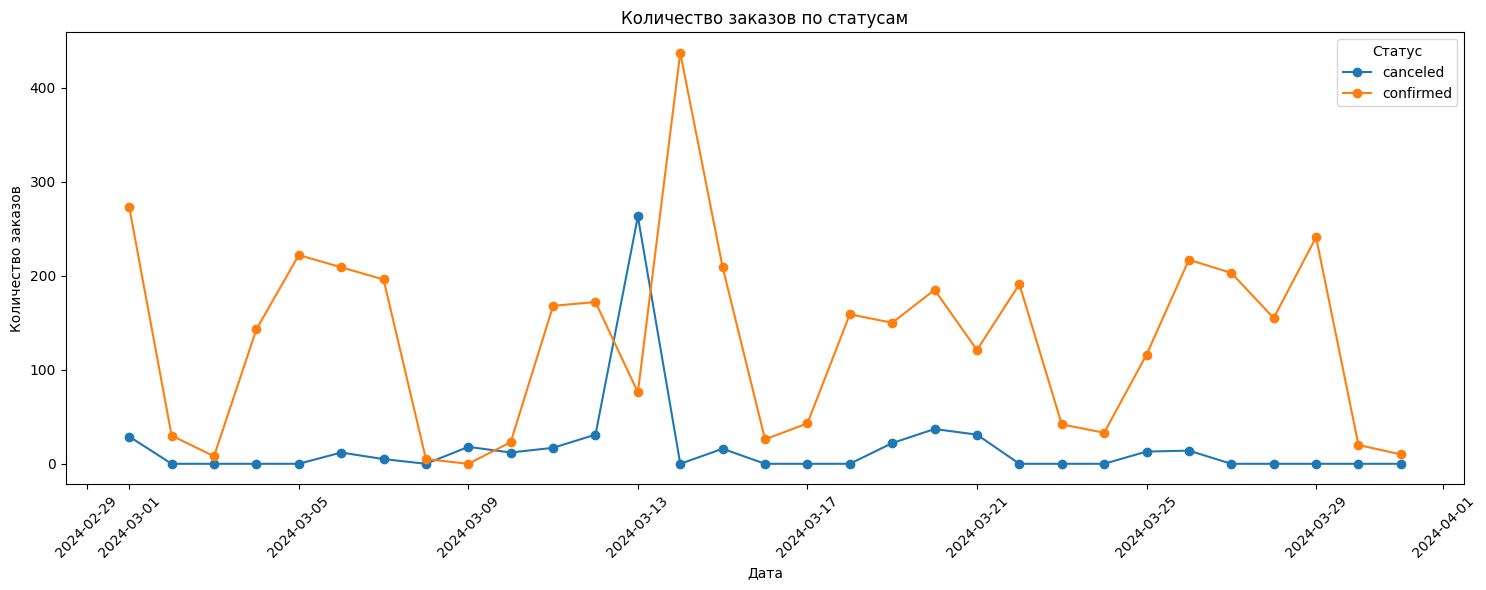

In [49]:
plt.figure(figsize=(15, 6))

for status in orders_status_pivot.columns:
    plt.plot(orders_status_pivot.index, orders_status_pivot[status], marker='o', label=status)
    
plt.title('Количество заказов по статусам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)  # Поворот меток на оси X
plt.legend(title='Статус')  # Легенда для статусов
plt.tight_layout()  # Автоматическая подстройка параметров графика
plt.show()

In [50]:
days = orders_status.loc[(orders_status.date == '2024-03-14') | (orders_status.date == '2024-03-13')]
days

,order_id,product_id,quantity,manager,date,client_id,status
1573,AFIH-00611801,511,13,Алексей Саксофонов,2024-03-13,43,canceled
1574,AFIH-00611801,240,21,Алексей Саксофонов,2024-03-13,43,canceled
1575,AFIH-00611801,583,8,Алексей Саксофонов,2024-03-13,43,canceled
1576,AFIH-00611801,468,5,Алексей Саксофонов,2024-03-13,43,canceled
1577,AFIH-00611801,648,16,Алексей Саксофонов,2024-03-13,43,canceled
...,...,...,...,...,...,...,...
2344,DMEB-71700015,756,42,Сергей Контрабасов,2024-03-14,93,confirmed
2345,DMEB-71700015,525,2,Сергей Контрабасов,2024-03-14,93,confirmed
2346,DMEB-71700015,590,22,Сергей Контрабасов,2024-03-14,93,confirmed
2347,DMEB-71700015,1260,11,Сергей Контрабасов,2024-03-14,93,confirmed


In [51]:
day_min = days.loc[(orders_status.date == '2024-03-13') & (orders_status.status =='canceled')]
day_min = day_min[['product_id','client_id','quantity','manager' ]]
day_min.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1573 to 1911
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  263 non-null    int64 
 1   client_id   263 non-null    int64 
 2   quantity    263 non-null    int64 
 3   manager     263 non-null    object
dtypes: int64(3), object(1)
memory usage: 10.3+ KB


In [52]:
day_max = days.loc[(orders_status.date == '2024-03-14') & (orders_status.status =='confirmed')]
day_max = day_max[['product_id','client_id','quantity','manager' ]]
day_max.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 1912 to 2348
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  437 non-null    int64 
 1   client_id   437 non-null    int64 
 2   quantity    437 non-null    int64 
 3   manager     437 non-null    object
dtypes: int64(3), object(1)
memory usage: 17.1+ KB


In [53]:
day_min_max = pd.merge(day_min, day_max, on =['product_id', 'client_id','quantity','manager'])

day_min_max

,product_id,client_id,quantity,manager
0,511,43,13,Алексей Саксофонов
1,240,43,21,Алексей Саксофонов
2,583,43,8,Алексей Саксофонов
3,468,43,5,Алексей Саксофонов
4,648,43,16,Алексей Саксофонов
...,...,...,...,...
218,1676,26,14,Маргарита Камертонова
219,421,26,36,Маргарита Камертонова
220,118,26,18,Маргарита Камертонова
221,804,26,21,Маргарита Камертонова


In [54]:
with open('usd_rate.txt', 'r', encoding='utf-8') as file:
    currency = file.readlines()
usd_rate = pd.DataFrame(currency, columns=['raw_data'])

In [55]:
currency

['2024-03-01,90.8423,Доллар США\n',
 '2024-03-02,91.3336,Доллар США\n',
 '2024-03-03,91.3336,Доллар США\n',
 '2024-03-04,91.3336,Доллар США\n',
 '2024-03-05,91.3534,Доллар США\n',
 '2024-03-06,91.1604,Доллар США\n',
 '2024-03-07,90.3412,Доллар США\n',
 '2024-03-08,90.7493,Доллар США\n',
 '2024-03-09,90.7493,Доллар США\n',
 '2024-03-10,90.7493,Доллар США\n',
 '2024-03-11,90.7493,Доллар США\n',
 '2024-03-12,90.6252,Доллар США\n',
 '2024-03-13,90.8818,Доллар США\n',
 '2024-03-14,91.5449,Доллар США\n',
 '2024-03-15,91.6359,Доллар США\n',
 '2024-03-16,91.87,Доллар США\n',
 '2024-03-17,91.87,Доллар США\n',
 '2024-03-18,91.87,Доллар США\n',
 '2024-03-19,91.9829,Доллар США\n',
 '2024-03-20,92.2243,Доллар США\n',
 '2024-03-21,92.6861,Доллар США\n',
 '2024-03-22,91.9499,Доллар США\n',
 '2024-03-23,92.6118,Доллар США\n',
 '2024-03-24,92.6118,Доллар США\n',
 '2024-03-25,92.6118,Доллар США\n',
 '2024-03-26,92.7761,Доллар США\n',
 '2024-03-27,92.5745,Доллар США\n',
 '2024-03-28,92.5919,Доллар США\n'

In [56]:
with open('usd_rate.txt', 'r', encoding='utf-8') as file:
    currency = file.readlines()
usd_rate = pd.DataFrame(currency, columns=['raw_data'])

# Разделим строки по пробелу и создадим отдельные колонки
usd_rate['raw_data'] = usd_rate['raw_data'].str.strip()  # убираем лишние пробелы и \n
usd_rate[['date', 'currency_rate', 'description']] = usd_rate['raw_data'].str.split(',', expand=True)

# 4. Преобразуем типы дату:
usd_rate['date'] = pd.to_datetime(usd_rate['date'], format='%Y-%m-%d')
usd_rate['currency_rate'] = pd.to_numeric(usd_rate['currency_rate'], errors='coerce')
# 5. Удаляем колонку 'raw_data', она больше не нужна
usd_rate = usd_rate.drop(columns=['raw_data'])



In [57]:
usd_rate = usd_rate[['date','currency_rate']]
usd_rate

,date,currency_rate
0,2024-03-01,90.8423
1,2024-03-02,91.3336
2,2024-03-03,91.3336
3,2024-03-04,91.3336
4,2024-03-05,91.3534
5,2024-03-06,91.1604
6,2024-03-07,90.3412
7,2024-03-08,90.7493
8,2024-03-09,90.7493
9,2024-03-10,90.7493


In [58]:
usd_rate.currency_rate.mean().round(2)

91.7

In [59]:
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,14,confirmed
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,14,confirmed
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01,14,confirmed
3,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01,14,confirmed
4,DUEU-27693834,1413,6,Алексей Саксофонов,2024-03-01,14,confirmed
...,...,...,...,...,...,...,...
4598,OYBY-86181208,1575,3,Анастасия Дудкина,2024-03-31,11,confirmed
4599,OYBY-86181208,941,11,Анастасия Дудкина,2024-03-31,11,confirmed
4600,OYBY-86181208,1335,22,Анастасия Дудкина,2024-03-31,11,confirmed
4601,OYBY-86181208,296,22,Анастасия Дудкина,2024-03-31,11,confirmed


In [60]:
df_products = df_products.rename(columns = {'id':'product_id'})
df_products

,product_id,name,price,category
0,36,"Anthem, AVM 70",2580.03,AV-процессор
1,40,"Arcam, AV860",3400.64,AV-процессор
2,41,"Arcam, AVR30",3600.85,AV-процессор
3,205,"Denon, AVC-X8500H",3600.95,AV-процессор
4,206,"Denon, AVC-X6700H",2225.50,AV-процессор
...,...,...,...,...
1672,1565,"Wharfedale, Diamond 220C",324.24,Центральный канал
1673,1673,"Yamaha, NS-C210",86.80,Центральный канал
1674,1674,"Yamaha, NS-C210BL",75.98,Центральный канал
1675,1675,"Yamaha, NS-C444",165.50,Центральный канал


In [61]:
df_full = pd.merge(orders_status,df_products, on =['product_id'])


In [62]:
df_full

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,14,confirmed,"Magnat, MC 400",430.56,Система караоке
1,ZRCV-04699238,933,7,Екатерина Тарелкина,2024-03-06,99,confirmed,"Magnat, MC 400",430.56,Система караоке
2,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, HPH-50B",41.78,Проводные наушники
3,PUNY-63984866,1645,32,Анастасия Дудкина,2024-03-04,91,confirmed,"Yamaha, HPH-50B",41.78,Проводные наушники
4,MFXL-78337954,1645,42,Максим Барабанов,2024-03-07,51,confirmed,"Yamaha, HPH-50B",41.78,Проводные наушники
...,...,...,...,...,...,...,...,...,...,...
4598,MQMM-71625676,56,3,Максим Барабанов,2024-03-29,70,confirmed,"AudioSource, AMP100VS",122.41,Усилитель мощности
4599,MQMM-71625676,1289,3,Максим Барабанов,2024-03-29,70,confirmed,"Rega, Planar 1",374.23,Виниловый проигрыватель
4600,PQHQ-30798505,1120,4,Максим Барабанов,2024-03-29,55,confirmed,"Pioneer, A-50DA",756.13,Интегральный усилитель
4601,UBQN-94821029,850,16,Маргарита Камертонова,2024-03-29,35,confirmed,"Mackie, CR5-XBT",261.62,Активные колонки


In [63]:
total = pd.merge(df_full,usd_rate, on =['date'])


In [64]:
total

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,14,confirmed,"Magnat, MC 400",430.56,Система караоке,90.8423
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, HPH-50B",41.78,Проводные наушники,90.8423
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423
3,GAFV-15191915,1596,24,Ксения Балалайкина,2024-03-01,57,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423
4,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01,14,confirmed,"JBL, Arena 125C",217.75,Центральный канал,90.8423
...,...,...,...,...,...,...,...,...,...,...,...
4598,DNHQ-30942998,637,15,Владимир Ударников,2024-03-02,95,confirmed,"JBL, SUB 260P",435.50,Сабвуфер,91.3336
4599,DNHQ-30942998,1403,24,Владимир Ударников,2024-03-02,95,confirmed,"Shure, SRH440",83.69,Проводные наушники,91.3336
4600,DNHQ-30942998,612,10,Владимир Ударников,2024-03-02,95,confirmed,"JBL, Arena 140",179.10,Полочная акустика,91.3336
4601,DNHQ-30942998,223,5,Владимир Ударников,2024-03-02,95,confirmed,"Denon, DP-300F",336.24,Виниловый проигрыватель,91.3336


In [65]:
total['price_rub'] = total['price']*total['currency_rate']
total

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,14,confirmed,"Magnat, MC 400",430.56,Система караоке,90.8423,39113.060688
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, HPH-50B",41.78,Проводные наушники,90.8423,3795.391294
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,27617.876046
3,GAFV-15191915,1596,24,Ксения Балалайкина,2024-03-01,57,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,27617.876046
4,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01,14,confirmed,"JBL, Arena 125C",217.75,Центральный канал,90.8423,19780.910825
...,...,...,...,...,...,...,...,...,...,...,...,...
4598,DNHQ-30942998,637,15,Владимир Ударников,2024-03-02,95,confirmed,"JBL, SUB 260P",435.50,Сабвуфер,91.3336,39775.782800
4599,DNHQ-30942998,1403,24,Владимир Ударников,2024-03-02,95,confirmed,"Shure, SRH440",83.69,Проводные наушники,91.3336,7643.708984
4600,DNHQ-30942998,612,10,Владимир Ударников,2024-03-02,95,confirmed,"JBL, Arena 140",179.10,Полочная акустика,91.3336,16357.847760
4601,DNHQ-30942998,223,5,Владимир Ударников,2024-03-02,95,confirmed,"Denon, DP-300F",336.24,Виниловый проигрыватель,91.3336,30710.009664


In [66]:
total['revenue'] = total['price_rub']*total['quantity']
total

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub,revenue
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,14,confirmed,"Magnat, MC 400",430.56,Система караоке,90.8423,39113.060688,2.737914e+05
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, HPH-50B",41.78,Проводные наушники,90.8423,3795.391294,1.366341e+05
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,27617.876046,1.104715e+06
3,GAFV-15191915,1596,24,Ксения Балалайкина,2024-03-01,57,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,27617.876046,6.628290e+05
4,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01,14,confirmed,"JBL, Arena 125C",217.75,Центральный канал,90.8423,19780.910825,1.978091e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,DNHQ-30942998,637,15,Владимир Ударников,2024-03-02,95,confirmed,"JBL, SUB 260P",435.50,Сабвуфер,91.3336,39775.782800,5.966367e+05
4599,DNHQ-30942998,1403,24,Владимир Ударников,2024-03-02,95,confirmed,"Shure, SRH440",83.69,Проводные наушники,91.3336,7643.708984,1.834490e+05
4600,DNHQ-30942998,612,10,Владимир Ударников,2024-03-02,95,confirmed,"JBL, Arena 140",179.10,Полочная акустика,91.3336,16357.847760,1.635785e+05
4601,DNHQ-30942998,223,5,Владимир Ударников,2024-03-02,95,confirmed,"Denon, DP-300F",336.24,Виниловый проигрыватель,91.3336,30710.009664,1.535500e+05


In [67]:
total

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub,revenue
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,14,confirmed,"Magnat, MC 400",430.56,Система караоке,90.8423,39113.060688,2.737914e+05
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, HPH-50B",41.78,Проводные наушники,90.8423,3795.391294,1.366341e+05
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,27617.876046,1.104715e+06
3,GAFV-15191915,1596,24,Ксения Балалайкина,2024-03-01,57,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,27617.876046,6.628290e+05
4,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01,14,confirmed,"JBL, Arena 125C",217.75,Центральный канал,90.8423,19780.910825,1.978091e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,DNHQ-30942998,637,15,Владимир Ударников,2024-03-02,95,confirmed,"JBL, SUB 260P",435.50,Сабвуфер,91.3336,39775.782800,5.966367e+05
4599,DNHQ-30942998,1403,24,Владимир Ударников,2024-03-02,95,confirmed,"Shure, SRH440",83.69,Проводные наушники,91.3336,7643.708984,1.834490e+05
4600,DNHQ-30942998,612,10,Владимир Ударников,2024-03-02,95,confirmed,"JBL, Arena 140",179.10,Полочная акустика,91.3336,16357.847760,1.635785e+05
4601,DNHQ-30942998,223,5,Владимир Ударников,2024-03-02,95,confirmed,"Denon, DP-300F",336.24,Виниловый проигрыватель,91.3336,30710.009664,1.535500e+05


In [68]:
df_confirmed = total.loc[total.status == 'confirmed']
df_confirmed

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub,revenue
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,14,confirmed,"Magnat, MC 400",430.56,Система караоке,90.8423,39113.060688,2.737914e+05
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, HPH-50B",41.78,Проводные наушники,90.8423,3795.391294,1.366341e+05
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,27617.876046,1.104715e+06
3,GAFV-15191915,1596,24,Ксения Балалайкина,2024-03-01,57,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,27617.876046,6.628290e+05
4,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01,14,confirmed,"JBL, Arena 125C",217.75,Центральный канал,90.8423,19780.910825,1.978091e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,DNHQ-30942998,637,15,Владимир Ударников,2024-03-02,95,confirmed,"JBL, SUB 260P",435.50,Сабвуфер,91.3336,39775.782800,5.966367e+05
4599,DNHQ-30942998,1403,24,Владимир Ударников,2024-03-02,95,confirmed,"Shure, SRH440",83.69,Проводные наушники,91.3336,7643.708984,1.834490e+05
4600,DNHQ-30942998,612,10,Владимир Ударников,2024-03-02,95,confirmed,"JBL, Arena 140",179.10,Полочная акустика,91.3336,16357.847760,1.635785e+05
4601,DNHQ-30942998,223,5,Владимир Ударников,2024-03-02,95,confirmed,"Denon, DP-300F",336.24,Виниловый проигрыватель,91.3336,30710.009664,1.535500e+05


In [69]:
products_in_orders = df_confirmed['product_id'].unique()


In [70]:
df_products['is_in_orders'] = df_products['product_id'].isin(products_in_orders).map({True: 'yes', False: 'no'})
df_products

,product_id,name,price,category,is_in_orders
0,36,"Anthem, AVM 70",2580.03,AV-процессор,no
1,40,"Arcam, AV860",3400.64,AV-процессор,no
2,41,"Arcam, AVR30",3600.85,AV-процессор,no
3,205,"Denon, AVC-X8500H",3600.95,AV-процессор,no
4,206,"Denon, AVC-X6700H",2225.50,AV-процессор,no
...,...,...,...,...,...
1672,1565,"Wharfedale, Diamond 220C",324.24,Центральный канал,yes
1673,1673,"Yamaha, NS-C210",86.80,Центральный канал,yes
1674,1674,"Yamaha, NS-C210BL",75.98,Центральный канал,yes
1675,1675,"Yamaha, NS-C444",165.50,Центральный канал,yes


In [71]:
df_products.loc[df_products.is_in_orders=='yes'].is_in_orders.count()

1180

In [72]:
df_products.loc[df_products.is_in_orders=='no'].is_in_orders.count()

497

In [73]:
df_products[['brand', 'name_3']] = df_products['name'].str.split(',', expand=True)
df_products

,product_id,name,price,category,is_in_orders,brand,name_3
0,36,"Anthem, AVM 70",2580.03,AV-процессор,no,Anthem,AVM 70
1,40,"Arcam, AV860",3400.64,AV-процессор,no,Arcam,AV860
2,41,"Arcam, AVR30",3600.85,AV-процессор,no,Arcam,AVR30
3,205,"Denon, AVC-X8500H",3600.95,AV-процессор,no,Denon,AVC-X8500H
4,206,"Denon, AVC-X6700H",2225.50,AV-процессор,no,Denon,AVC-X6700H
...,...,...,...,...,...,...,...
1672,1565,"Wharfedale, Diamond 220C",324.24,Центральный канал,yes,Wharfedale,Diamond 220C
1673,1673,"Yamaha, NS-C210",86.80,Центральный канал,yes,Yamaha,NS-C210
1674,1674,"Yamaha, NS-C210BL",75.98,Центральный канал,yes,Yamaha,NS-C210BL
1675,1675,"Yamaha, NS-C444",165.50,Центральный канал,yes,Yamaha,NS-C444


In [74]:
# Группируем данные по бренду и колонке,где указано,есть товар в заказах, считаем число уникальных товаров. 
# Колонку с числом товаров переименуем в products.
# Определим у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда. 
# Но не берем в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

df_products_1 = df_products.groupby(['brand','is_in_orders'], as_index=False).\
                            agg({'product_id':'nunique'}).\
                            rename(columns = {'product_id':'products'})
df_products_1_pivot =df_products_1.pivot_table(index='brand', columns='is_in_orders', \
                                               values='products', aggfunc='sum', fill_value=0)
df_products_1_pivot= df_products_1_pivot.reset_index()
df_products_1_pivot['total_prod']= df_products_1_pivot['no']+df_products_1_pivot['yes']
df_products_1_pivot['rate'] = df_products_1_pivot['no']/df_products_1_pivot['total_prod']
df_products_1_pivot.loc[(df_products_1_pivot.rate>0.5) & (df_products_1_pivot.total_prod >15)]

is_in_orders,brand,no,yes,total_prod,rate
32,Dali,49,18,67,0.731343
60,KEF,54,28,82,0.658537
77,Marantz,19,3,22,0.863636
94,Pioneer,70,33,103,0.679612


In [75]:
df_confirmed

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub,revenue
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,14,confirmed,"Magnat, MC 400",430.56,Система караоке,90.8423,39113.060688,2.737914e+05
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, HPH-50B",41.78,Проводные наушники,90.8423,3795.391294,1.366341e+05
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,27617.876046,1.104715e+06
3,GAFV-15191915,1596,24,Ксения Балалайкина,2024-03-01,57,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,27617.876046,6.628290e+05
4,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01,14,confirmed,"JBL, Arena 125C",217.75,Центральный канал,90.8423,19780.910825,1.978091e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,DNHQ-30942998,637,15,Владимир Ударников,2024-03-02,95,confirmed,"JBL, SUB 260P",435.50,Сабвуфер,91.3336,39775.782800,5.966367e+05
4599,DNHQ-30942998,1403,24,Владимир Ударников,2024-03-02,95,confirmed,"Shure, SRH440",83.69,Проводные наушники,91.3336,7643.708984,1.834490e+05
4600,DNHQ-30942998,612,10,Владимир Ударников,2024-03-02,95,confirmed,"JBL, Arena 140",179.10,Полочная акустика,91.3336,16357.847760,1.635785e+05
4601,DNHQ-30942998,223,5,Владимир Ударников,2024-03-02,95,confirmed,"Denon, DP-300F",336.24,Виниловый проигрыватель,91.3336,30710.009664,1.535500e+05


In [76]:
order_id_unique = df_confirmed['order_id'].nunique()
order_id_unique

309

In [77]:
# Average Order Value - средний чек
AOV = (df_confirmed['revenue'].sum()/order_id_unique).round(2)
AOV

6596219.49

In [78]:
# Сгруппируем df_confirmed с подтвержденными заказами по дате, считаем на каждую дату число ункальных заказов и выручку.
df_report_by_date = df_confirmed.groupby('date',as_index = False).\
                                 agg({'order_id': 'nunique', 'revenue':'sum'}).\
                                 rename(columns = {'order_id':'orders'})
    
df_report_by_date['average_bill'] = (df_report_by_date['revenue']/df_report_by_date['orders']).round(2)

In [79]:
df_report_by_date

,date,orders,revenue,average_bill
0,2024-03-01,20,1.554118e+08,7770587.80
1,2024-03-02,2,1.197167e+07,5985834.26
2,2024-03-03,1,2.548418e+06,2548418.42
3,2024-03-04,10,6.404993e+07,6404992.56
4,2024-03-05,18,8.952724e+07,4973735.46
5,2024-03-06,13,1.107687e+08,8520669.46
6,2024-03-07,13,9.102331e+07,7001792.83
7,2024-03-08,1,1.609147e+06,1609146.62
8,2024-03-10,2,8.929309e+06,4464654.57
9,2024-03-11,11,8.910847e+07,8100769.59


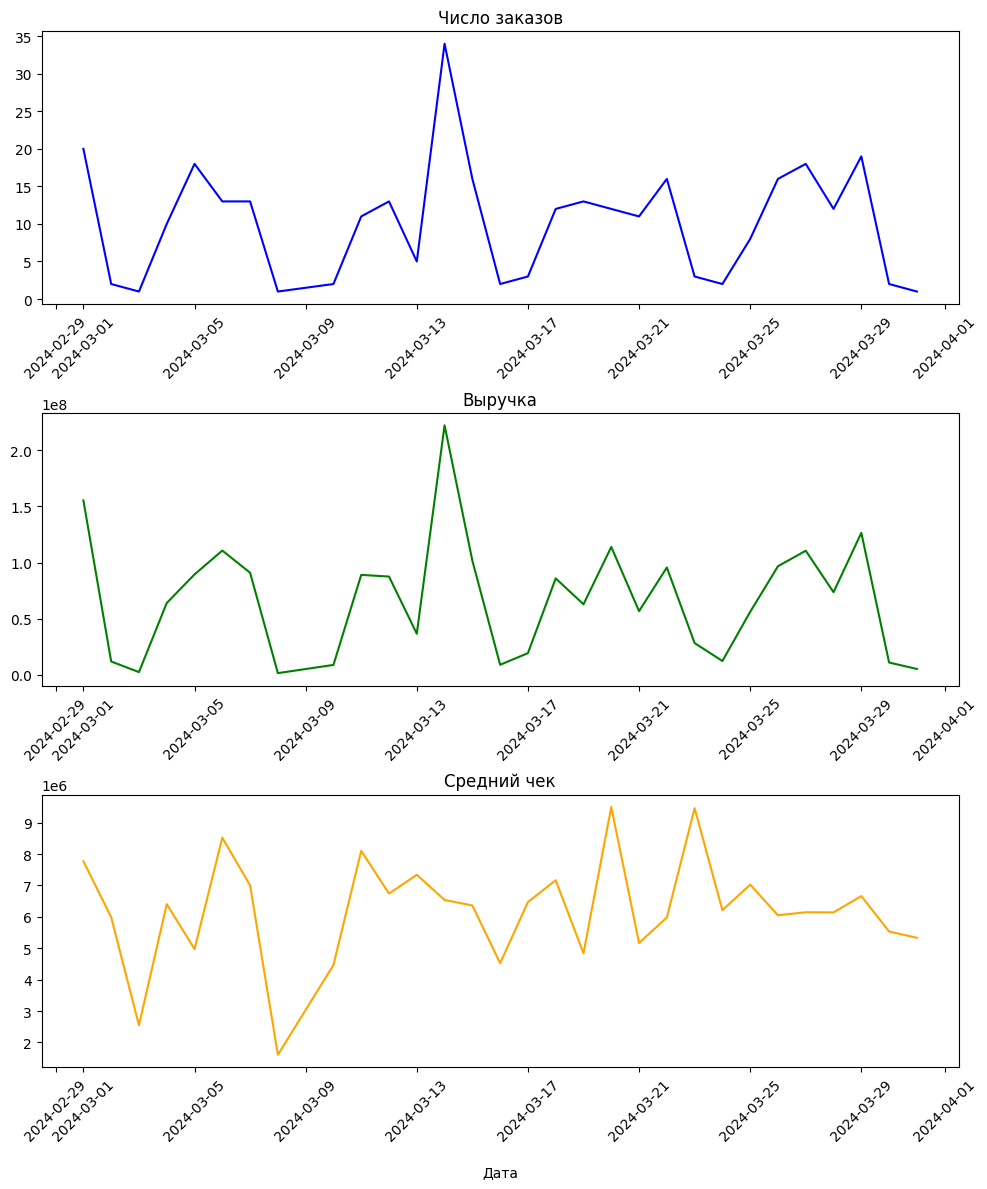

In [80]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Первый график
axs[0].plot(df_report_by_date['date'], df_report_by_date['orders'], color='blue')
axs[0].set_title('Число заказов')

# Второй график
axs[1].plot(df_report_by_date['date'], df_report_by_date['revenue'], color='green')
axs[1].set_title('Выручка')

# Третий график
axs[2].plot(df_report_by_date['date'], df_report_by_date['average_bill'], color='orange')
axs[2].set_title('Средний чек')

for ax in axs:
    ax.tick_params(labelbottom=True)
    ax.tick_params(axis='x', rotation=45)

# Общая подпись по оси X
plt.xlabel('\nДата')

# Автоматическая подстройка
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  

# Показать всё
plt.show()

In [81]:
total[['brand', 'name_3']] = total['name'].str.split(',', expand=True)


In [82]:
total

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub,revenue,brand,name_3
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,14,confirmed,"Magnat, MC 400",430.56,Система караоке,90.8423,39113.060688,2.737914e+05,Magnat,MC 400
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, HPH-50B",41.78,Проводные наушники,90.8423,3795.391294,1.366341e+05,Yamaha,HPH-50B
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,27617.876046,1.104715e+06,Yamaha,YH-E700A
3,GAFV-15191915,1596,24,Ксения Балалайкина,2024-03-01,57,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,27617.876046,6.628290e+05,Yamaha,YH-E700A
4,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01,14,confirmed,"JBL, Arena 125C",217.75,Центральный канал,90.8423,19780.910825,1.978091e+05,JBL,Arena 125C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,DNHQ-30942998,637,15,Владимир Ударников,2024-03-02,95,confirmed,"JBL, SUB 260P",435.50,Сабвуфер,91.3336,39775.782800,5.966367e+05,JBL,SUB 260P
4599,DNHQ-30942998,1403,24,Владимир Ударников,2024-03-02,95,confirmed,"Shure, SRH440",83.69,Проводные наушники,91.3336,7643.708984,1.834490e+05,Shure,SRH440
4600,DNHQ-30942998,612,10,Владимир Ударников,2024-03-02,95,confirmed,"JBL, Arena 140",179.10,Полочная акустика,91.3336,16357.847760,1.635785e+05,JBL,Arena 140
4601,DNHQ-30942998,223,5,Владимир Ударников,2024-03-02,95,confirmed,"Denon, DP-300F",336.24,Виниловый проигрыватель,91.3336,30710.009664,1.535500e+05,Denon,DP-300F


In [83]:
total['brand'].nunique()

121

In [84]:
total

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub,revenue,brand,name_3
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,14,confirmed,"Magnat, MC 400",430.56,Система караоке,90.8423,39113.060688,2.737914e+05,Magnat,MC 400
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, HPH-50B",41.78,Проводные наушники,90.8423,3795.391294,1.366341e+05,Yamaha,HPH-50B
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01,14,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,27617.876046,1.104715e+06,Yamaha,YH-E700A
3,GAFV-15191915,1596,24,Ксения Балалайкина,2024-03-01,57,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,27617.876046,6.628290e+05,Yamaha,YH-E700A
4,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01,14,confirmed,"JBL, Arena 125C",217.75,Центральный канал,90.8423,19780.910825,1.978091e+05,JBL,Arena 125C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,DNHQ-30942998,637,15,Владимир Ударников,2024-03-02,95,confirmed,"JBL, SUB 260P",435.50,Сабвуфер,91.3336,39775.782800,5.966367e+05,JBL,SUB 260P
4599,DNHQ-30942998,1403,24,Владимир Ударников,2024-03-02,95,confirmed,"Shure, SRH440",83.69,Проводные наушники,91.3336,7643.708984,1.834490e+05,Shure,SRH440
4600,DNHQ-30942998,612,10,Владимир Ударников,2024-03-02,95,confirmed,"JBL, Arena 140",179.10,Полочная акустика,91.3336,16357.847760,1.635785e+05,JBL,Arena 140
4601,DNHQ-30942998,223,5,Владимир Ударников,2024-03-02,95,confirmed,"Denon, DP-300F",336.24,Виниловый проигрыватель,91.3336,30710.009664,1.535500e+05,Denon,DP-300F


In [85]:
total_brands=total.groupby('brand', as_index = False).\
                   agg({'order_id': 'nunique', 'revenue':'sum'}).\
                   sort_values('revenue', ascending =False)
top_5_brands = total_brands.head(5)
top_5_brands

,brand,order_id,revenue
46,JBL,297,3.080112e+08
43,Heco,256,2.632046e+08
53,Klipsch,229,2.205107e+08
120,Yamaha,244,1.798673e+08
49,KEF,80,1.619835e+08


In [86]:
total_manager = df_confirmed.groupby('manager', as_index = False).\
                             agg({'revenue':'sum','order_id':'nunique'}).\
                             sort_values('revenue')
total_manager['manager_rate']=(total_manager['revenue']*100/total_manager.revenue.sum()).round(2)
total_manager['manager_rate_orders']=(total_manager['order_id']*100/total_manager.order_id.sum()).round(2)
top_5_managers = total_manager.sort_values('manager_rate', ascending = False).head(5)
top_5_managers

,manager,revenue,order_id,manager_rate,manager_rate_orders
9,Маргарита Камертонова,3.473886e+08,48,17.04,15.53
4,Виктор Тромбонов,3.188999e+08,50,15.65,16.18
8,Максим Барабанов,2.401478e+08,40,11.78,12.94
5,Владимир Ударников,2.084865e+08,31,10.23,10.03
0,Алексей Саксофонов,1.953435e+08,27,9.58,8.74


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4be17dce-80ef-4cee-9f0e-a041cc84d2ef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>